In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os

In [2]:
'''
#!pip install livelossplot
!python -m pip install --upgrade pip
%matplotlib inline
!pip install Livelossplot
'''

'\n#!pip install livelossplot\n!python -m pip install --upgrade pip\n%matplotlib inline\n!pip install Livelossplot\n'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install livelossplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#!pip install Livelossplot
#from Livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
sampling_seed=0
size_4_training=78786
epoch_4_test=30
img_size=50
#training_reshape=(-1, img_size, img_size, 3)

# **Loading Training Files**

I have converted all images to numpy array to boost speed

In [5]:

os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  
os.mkdir('./History')

In [6]:
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='../working/data/train_seg/'
validation_dir='../working/data/val_seg/'
#train_dir='../working/data/train_seg/'  
#test_dir = '../working/data/test_seg/normal'  
test_dir = '../working/data/test_seg/'  

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training)
class0label=np.zeros(size_4_training)
class1sample=random.sample(class1,size_4_training)
class1label=np.ones(size_4_training)

class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val, class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val, class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            #print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
   
class0train_path='../working/data/train_seg/idc-minus/'
class1train_path='../working/data/train_seg/idc-plus/'
class0test_path='../working/data/test_seg/idc-minus/'
class1test_path='../working/data/test_seg/idc-plus/'
class0val_path='../working/data/val_seg/idc-minus/'
class1val_path='../working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/102

In [7]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


In [8]:
import os
import cv2
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)

def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    combined_label=to_categorical(combined_label,num_classes=2)
    #i=0
    #for i in range(length):
    #    print(combined_label[i])



    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(224,224,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)

(110300, 50, 50, 3)
(14182, 50, 50, 3)
(33090, 50, 50, 3)


In [9]:
'''
import numpy as np


class0_array = readImage(class0path, 0)
class1_array = readImage(class1path, 1)

class0_array=np.array(class0_array)
class1_array=np.array(class1_array)
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)
print(class0_array.shape)
print(class1_array.shape)

X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X.shape)
#print(y.shape)

# reshape X data
train_data = np.array(X).reshape(training_reshape)
train_label=np.array(y)
print(y[19990:19999])
print(train_data.shape)
print(train_label.shape)
'''

'\nimport numpy as np\n\n\nclass0_array = readImage(class0path, 0)\nclass1_array = readImage(class1path, 1)\n\nclass0_array=np.array(class0_array)\nclass1_array=np.array(class1_array)\ncombined_data = np.concatenate((class0_array, class1_array))\nrandom.seed(41)\nrandom.shuffle(combined_data)\nprint(class0_array.shape)\nprint(class1_array.shape)\n\nX = []\ny = []\n\nfor features,label in combined_data:\n    X.append(features)\n    y.append(label)\n#print(X.shape)\n#print(y.shape)\n\n# reshape X data\ntrain_data = np.array(X).reshape(training_reshape)\ntrain_label=np.array(y)\nprint(y[19990:19999])\nprint(train_data.shape)\nprint(train_label.shape)\n'

In [10]:
'''
label_normal = np.zeros(len(normal))
label_bacterial = np.ones(len(bacterial))
label_viral = np.full(len(viral),2, dtype = int)
train_data = np.concatenate((normal,bacterial,viral),axis=0)
train_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)
train_label.shape, train_data.shape
'''

'\nlabel_normal = np.zeros(len(normal))\nlabel_bacterial = np.ones(len(bacterial))\nlabel_viral = np.full(len(viral),2, dtype = int)\ntrain_data = np.concatenate((normal,bacterial,viral),axis=0)\ntrain_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)\ntrain_label.shape, train_data.shape\n'

In [11]:
'''
#!pip install sklearn
from sklearn.model_selection import train_test_split
train_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)
val_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)
'''

'\n#!pip install sklearn\nfrom sklearn.model_selection import train_test_split\ntrain_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)\nval_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)\n'

In [12]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

## Visualization

In [13]:
import matplotlib.pyplot as plt

### Normal

# Viral

## Bacterial

# Loading Test Data

## Visualization

## Normal

## Viral

## Bacterial

**Label encode**

# Dealing with Class Imbalance

# [CovXNet: A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

#### Code:[here](https://github.com/Perceptron21/CovXNet)
## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


## Residual Unit

In [14]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x


## Shifter Unit

In [15]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

# Network128

In [16]:
from tensorflow.keras.optimizers import Adam

In [17]:
#Network:
  
def Network128(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
  x = BatchNormalization()(x)
  
##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

  x = GlobalAveragePooling2D()(x)
  #x = GlobalMaxPooling2D()(x)

  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)

  x = Dense(nb_class, activation= 'softmax')(x)

  model = Model(xin, x)

  model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 1e-4), metrics = ['accuracy'])

  return model

# Custom Callback

In [18]:
# plot confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas.util.testing as tm
from sklearn import metrics
import seaborn as sns
sns.set()

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=False)
    if save == True:
      plt.savefig('Confusion Matrix.png', dpi = 900)

In [19]:
# test model performance
from datetime import datetime
import matplotlib.pyplot as plt


def test_model(model, test_generator, y_test, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_original>0.5).astype('int')

    y_pred = np.argmax(y_pred_original, axis = 1)
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    
    return


from keras.callbacks import Callback
class MyLogger(Callback):
  
  def __init__(self, test_generator, y_test, class_labels):
    super(MyLogger, self).__init__()
    self.test_generator = test_generator
    self.y_test = y_test
    self.class_labels = class_labels
    
  def on_epoch_end(self, epoch, logs=None):
    test_model(self.model, self.test_generator, self.y_test, self.class_labels)

In [20]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_test_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_test>0.5).astype('int')

    y_pred_test = np.argmax(y_pred_test_original, axis = 1)
    
    y_train = y_train.astype(int) # sparse form not categorical
    y_val = y_val.astype(int) # sparse form not categorical
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred_test
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred_test)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred_test)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    print("calculate other score")
    print("predicting validation data")

    #calculate other score
    y_pred_val_original = model.predict_generator(val_generator,verbose=1)
    # y_pred = (y_pred_val>0.5).astype('int')

    y_pred_val = np.argmax(y_pred_val_original, axis = 1)
    # y_val = np.argmax(valy, axis= 1)
    #y_val = np.argmax(valy, axis=-1)
    print("predicting test data")
    y_pred_train_original = model.predict_generator(train_generator,verbose=1)
    # y_pred = (y_pred_train>0.5).astype('int')

    y_pred_train = np.argmax(y_pred_train_original, axis = 1)
    # y_train = np.argmax(trainy, axis= 1)
    #y_train = np.argmax(trainy, axis=-1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(y_train, y_pred_train)*100), "%")
    
    print("Val accuracy Score--------->")
    
    print("{0:.3f}".format(accuracy_score(y_val, y_pred_val)*100), "%")
    

    
  
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, y_pred_test)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, y_pred_test)*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, y_pred_test)
    cf_matrix_val = confusion_matrix(y_val, y_pred_val)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()
    
    
    return

# One Hot Encoding the labels

# ImageDataGenerator

In [21]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import *


#train_datagen2 = ImageDataGenerator(rescale = 1/255)

train_datagen = ImageDataGenerator(rescale = 1/255,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'constant',
                                  zoom_range = 0.1,
                                  rotation_range = 20)

val_datagen = ImageDataGenerator(rescale = 1/255)
val2_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow(train_data,
                                     train_label, 
                                     batch_size = 16, 
                                     shuffle = False)

val_generator = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)
val2_generator = val_datagen.flow(val_data,
                                 val_label,
                                 batch_size = 16,
                                 shuffle = False)

# Vizualization After Augmentation

In [22]:
#get the first patch for visualization
images, labels = train_generator.next()

In [23]:
#get the augmented data
#train_data1=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
train_label1=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
#print(train_data1.shape)
print(train_label1.shape)
#print(y)

(110300, 2)


100%|██████████| 3/3 [00:00<00:00, 222.26it/s]


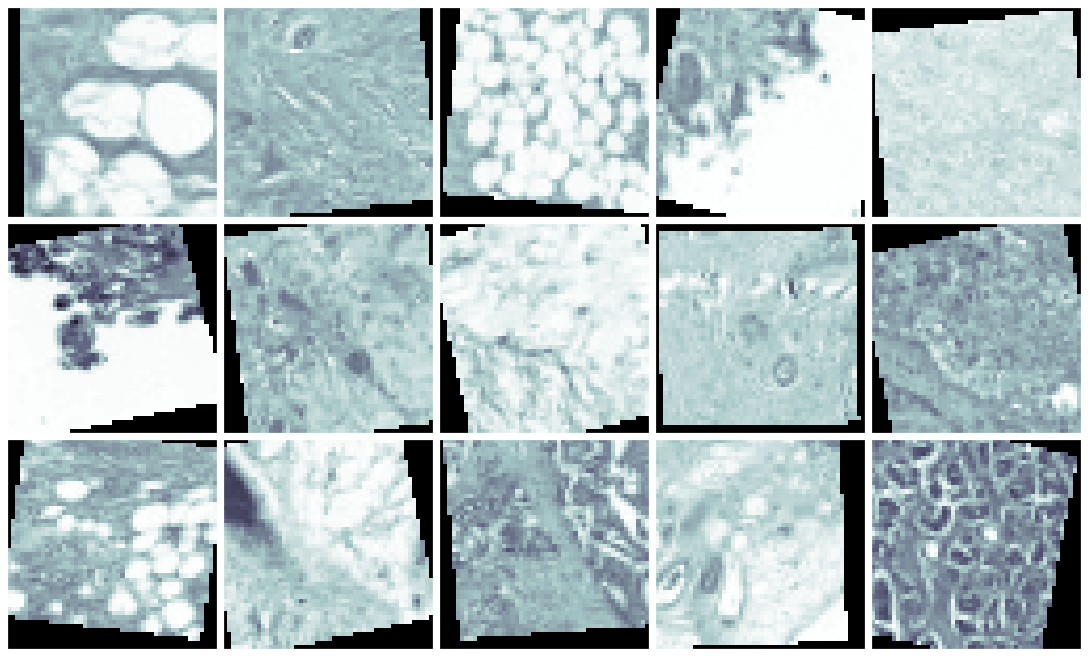

In [24]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Callback

In [25]:
#os.mkdir('Model')


In [26]:
#os.mkdir('History')
def get_callbacks():
    
#    filepath = './Model/best_model_multiclass_128.hdf5'
    filepath = 'best_model_multiclass_128.h5'
    callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    #callback1 = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='min')
    callback2 = MyLogger(val_generator, 
                         y_test = np.argmax(test_label, axis = 1),
                         class_labels = ['idc-', 'idc+'])
    
    callback3 = CSVLogger('./History/Multiclass_Log_128.csv')

    return [callback1 ,callback2, callback3]

# Training

In [27]:

model = Network128(input_shape = (img_size, img_size, 3), nb_class = 2, depth = 5)
model.summary() 

2022-06-05 01:12:21.523929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 01:12:21.689388: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 01:12:21.690217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 01:12:21.691408: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 50, 50, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 25, 25, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

# Plotting Model

In [28]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, show_shapes=True)

load weight success
Epoch 1/30


2022-06-05 01:12:28.607281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-05 01:12:43.669332: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


6893/6893 [==============================] - 883s 125ms/step - loss: 0.2351 - accuracy: 0.9035 - val_loss: 0.2610 - val_accuracy: 0.8934

Epoch 00001: val_accuracy improved from -inf to 0.89341, saving model to best_model_multiclass_128.h5
Predicting test data
887/887 [==============================] - 21s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:21.102955


---------------------
| Balanced Accuracy  |
---------------------

    0.8933154703144831


---------------------
|      Accuracy      |
---------------------

    0.8933154703144831


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.90      0.89      0.89     14182
weighted avg       0.90      0.89      0.89     14182

--------------------
| Confusion Matri

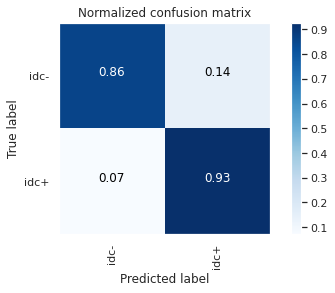

Epoch 2/30
6893/6893 [==============================] - 867s 126ms/step - loss: 0.2293 - accuracy: 0.9063 - val_loss: 0.2626 - val_accuracy: 0.8938

Epoch 00002: val_accuracy improved from 0.89341 to 0.89376, saving model to best_model_multiclass_128.h5
Predicting test data
887/887 [==============================] - 18s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.519933


---------------------
| Balanced Accuracy  |
---------------------

    0.8936680298970526


---------------------
|      Accuracy      |
---------------------

    0.8936680298970526


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.90      0.89      0.89     14182
weighted avg       0.90      0.89      0.89     14182

--------------------
| C

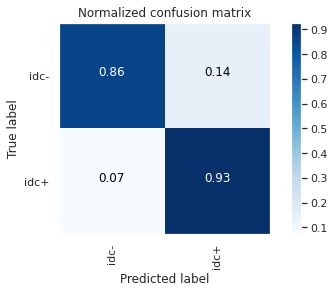

Epoch 3/30
6893/6893 [==============================] - 870s 126ms/step - loss: 0.2267 - accuracy: 0.9075 - val_loss: 0.2641 - val_accuracy: 0.8928

Epoch 00003: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:19.176279


---------------------
| Balanced Accuracy  |
---------------------

    0.892751374982372


---------------------
|      Accuracy      |
---------------------

    0.892751374982372


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6092  999

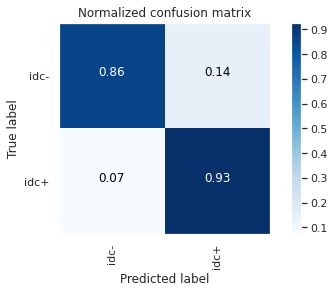

Epoch 4/30
6893/6893 [==============================] - 872s 127ms/step - loss: 0.2239 - accuracy: 0.9093 - val_loss: 0.2617 - val_accuracy: 0.8931

Epoch 00004: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 20s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:19.682973


---------------------
| Balanced Accuracy  |
---------------------

    0.8930334226484276


---------------------
|      Accuracy      |
---------------------

    0.8930334226484276


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.92      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6127  9

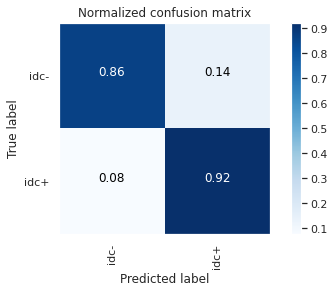

Epoch 5/30
6893/6893 [==============================] - 875s 127ms/step - loss: 0.2223 - accuracy: 0.9095 - val_loss: 0.2649 - val_accuracy: 0.8913

Epoch 00005: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 20s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:19.638322


---------------------
| Balanced Accuracy  |
---------------------

    0.8912001128190664


---------------------
|      Accuracy      |
---------------------

    0.8912001128190664


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.93      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6074 10

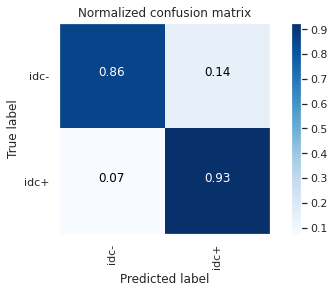

Epoch 6/30
6893/6893 [==============================] - 880s 128ms/step - loss: 0.2206 - accuracy: 0.9096 - val_loss: 0.2680 - val_accuracy: 0.8914

Epoch 00006: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 20s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.512202


---------------------
| Balanced Accuracy  |
---------------------

    0.8912706247355804


---------------------
|      Accuracy      |
---------------------

    0.8912706247355803


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7091
           1       0.86      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6035 10

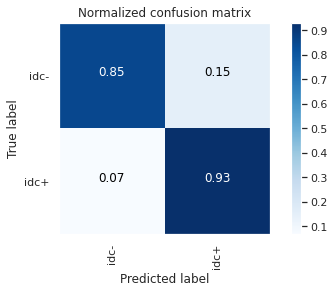

Epoch 7/30
6893/6893 [==============================] - 884s 128ms/step - loss: 0.2180 - accuracy: 0.9110 - val_loss: 0.2701 - val_accuracy: 0.8921

Epoch 00007: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 21s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.006525


---------------------
| Balanced Accuracy  |
---------------------

    0.8919757439007192


---------------------
|      Accuracy      |
---------------------

    0.8919757439007192


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7091
           1       0.86      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6024 10

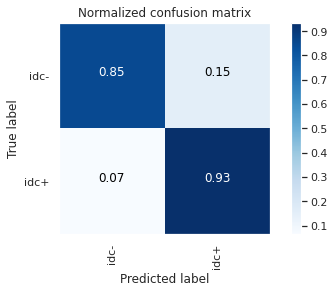

Epoch 8/30
6893/6893 [==============================] - 885s 128ms/step - loss: 0.2158 - accuracy: 0.9116 - val_loss: 0.2751 - val_accuracy: 0.8900

Epoch 00008: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.513100


---------------------
| Balanced Accuracy  |
---------------------

    0.8899308983218164


---------------------
|      Accuracy      |
---------------------

    0.8899308983218164


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7091
           1       0.86      0.93      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6017 10

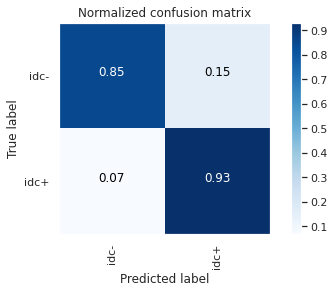

Epoch 9/30
6893/6893 [==============================] - 883s 128ms/step - loss: 0.2144 - accuracy: 0.9125 - val_loss: 0.2687 - val_accuracy: 0.8925

Epoch 00009: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 21s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.024882


---------------------
| Balanced Accuracy  |
---------------------

    0.8923988153998026


---------------------
|      Accuracy      |
---------------------

    0.8923988153998026


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7091
           1       0.86      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6047 10

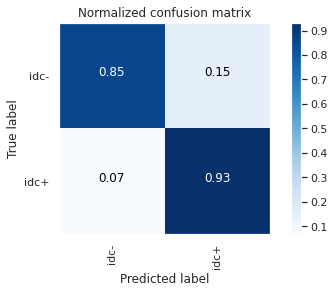

Epoch 10/30
6893/6893 [==============================] - 884s 128ms/step - loss: 0.2130 - accuracy: 0.9119 - val_loss: 0.2652 - val_accuracy: 0.8907

Epoch 00010: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 18s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.510037


---------------------
| Balanced Accuracy  |
---------------------

    0.8905655055704415


---------------------
|      Accuracy      |
---------------------

    0.8905655055704415


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.92      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6082 1

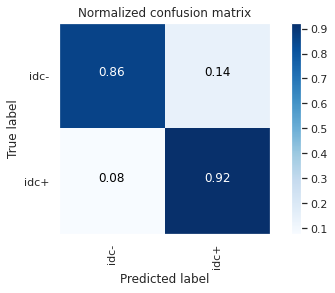

Epoch 11/30
6893/6893 [==============================] - 885s 128ms/step - loss: 0.2130 - accuracy: 0.9127 - val_loss: 0.2672 - val_accuracy: 0.8927

Epoch 00011: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 21s 24ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:21.082252


---------------------
| Balanced Accuracy  |
---------------------

    0.8926103511493442


---------------------
|      Accuracy      |
---------------------

    0.8926103511493443


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7091
           1       0.86      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.90      0.89      0.89     14182
weighted avg       0.90      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6029 1

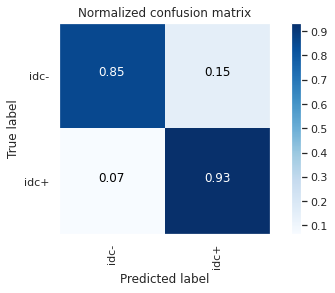

Epoch 12/30
6893/6893 [==============================] - 887s 129ms/step - loss: 0.2107 - accuracy: 0.9144 - val_loss: 0.2706 - val_accuracy: 0.8918

Epoch 00012: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 22s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.025360


---------------------
| Balanced Accuracy  |
---------------------

    0.8916936962346637


---------------------
|      Accuracy      |
---------------------

    0.8916936962346637


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      7091
           1       0.86      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6056 1

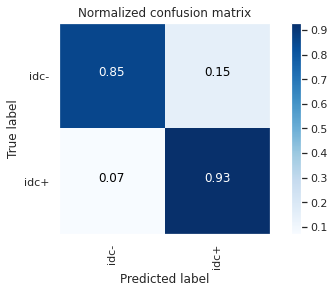

Epoch 13/30
6893/6893 [==============================] - 890s 129ms/step - loss: 0.2096 - accuracy: 0.9143 - val_loss: 0.2685 - val_accuracy: 0.8938

Epoch 00013: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.509015


---------------------
| Balanced Accuracy  |
---------------------

    0.8936680298970526


---------------------
|      Accuracy      |
---------------------

    0.8936680298970526


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.90      0.89      0.89     14182
weighted avg       0.90      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6082 1

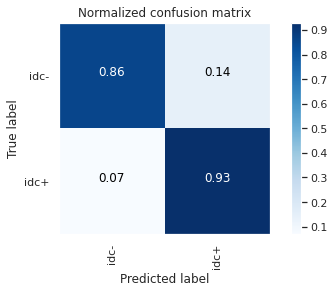

Epoch 14/30
6893/6893 [==============================] - 889s 129ms/step - loss: 0.2078 - accuracy: 0.9154 - val_loss: 0.2743 - val_accuracy: 0.8912

Epoch 00014: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 23s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:22.669328


---------------------
| Balanced Accuracy  |
---------------------

    0.8910590889860386


---------------------
|      Accuracy      |
---------------------

    0.8910590889860387


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.92      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6107  

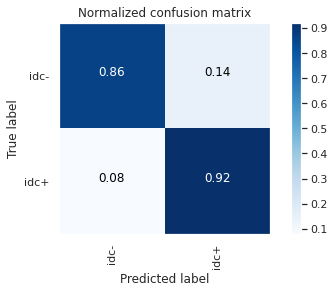

Epoch 15/30
6893/6893 [==============================] - 891s 129ms/step - loss: 0.2074 - accuracy: 0.9151 - val_loss: 0.2707 - val_accuracy: 0.8924

Epoch 00015: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.627673


---------------------
| Balanced Accuracy  |
---------------------

    0.8922577915667749


---------------------
|      Accuracy      |
---------------------

    0.8922577915667748


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7091
           1       0.86      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6035 1

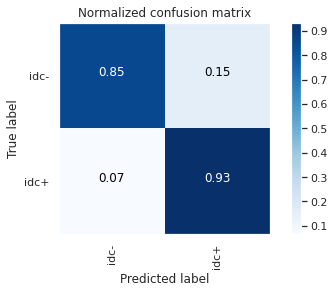

Epoch 16/30
6893/6893 [==============================] - 891s 129ms/step - loss: 0.2055 - accuracy: 0.9162 - val_loss: 0.2687 - val_accuracy: 0.8917

Epoch 00016: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 23s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:22.965874


---------------------
| Balanced Accuracy  |
---------------------

    0.8916231843181498


---------------------
|      Accuracy      |
---------------------

    0.8916231843181498


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.92      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6091 1

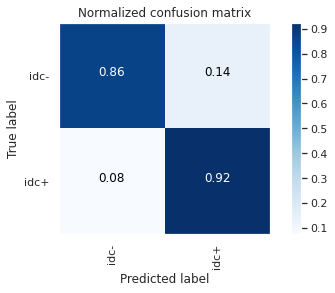

Epoch 17/30
6893/6893 [==============================] - 890s 129ms/step - loss: 0.2039 - accuracy: 0.9162 - val_loss: 0.2761 - val_accuracy: 0.8914

Epoch 00017: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 24s 26ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:23.543080


---------------------
| Balanced Accuracy  |
---------------------

    0.8912706247355804


---------------------
|      Accuracy      |
---------------------

    0.8912706247355803


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7091
           1       0.86      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6035 1

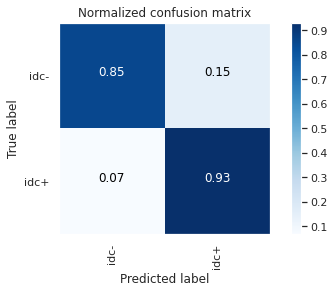

Epoch 18/30
6893/6893 [==============================] - 880s 128ms/step - loss: 0.2040 - accuracy: 0.9170 - val_loss: 0.2763 - val_accuracy: 0.8889

Epoch 00018: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 18s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.507943


---------------------
| Balanced Accuracy  |
---------------------

    0.8888027076575942


---------------------
|      Accuracy      |
---------------------

    0.8888027076575942


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7091
           1       0.86      0.93      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6044 1

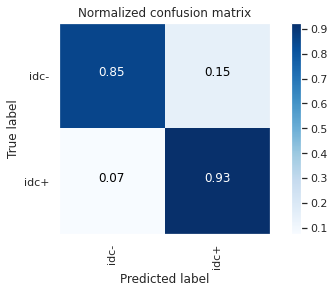

Epoch 19/30
6893/6893 [==============================] - 881s 128ms/step - loss: 0.2036 - accuracy: 0.9176 - val_loss: 0.2759 - val_accuracy: 0.8896

Epoch 00019: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 24s 27ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:24.138515


---------------------
| Balanced Accuracy  |
---------------------

    0.889507826822733


---------------------
|      Accuracy      |
---------------------

    0.889507826822733


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.86      0.92      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6065 102

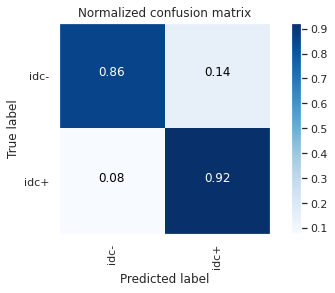

Epoch 20/30
6893/6893 [==============================] - 881s 128ms/step - loss: 0.2018 - accuracy: 0.9173 - val_loss: 0.2830 - val_accuracy: 0.8891

Epoch 00020: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.511943


---------------------
| Balanced Accuracy  |
---------------------

    0.8890142434071358


---------------------
|      Accuracy      |
---------------------

    0.8890142434071358


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7091
           1       0.85      0.94      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[5953 1

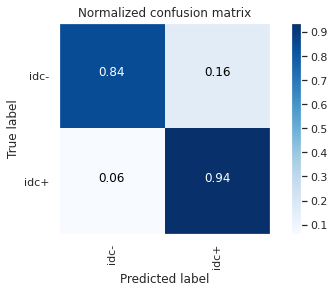

Epoch 21/30
6893/6893 [==============================] - 884s 128ms/step - loss: 0.2011 - accuracy: 0.9180 - val_loss: 0.2785 - val_accuracy: 0.8914

Epoch 00021: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 24s 27ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.009223


---------------------
| Balanced Accuracy  |
---------------------

    0.8913411366520942


---------------------
|      Accuracy      |
---------------------

    0.8913411366520942


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      7091
           1       0.86      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6048 1

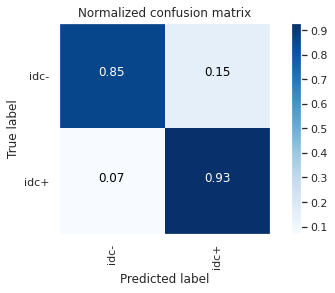

Epoch 22/30
6893/6893 [==============================] - 887s 129ms/step - loss: 0.1996 - accuracy: 0.9183 - val_loss: 0.2853 - val_accuracy: 0.8888

Epoch 00022: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:20.554390


---------------------
| Balanced Accuracy  |
---------------------

    0.8887321957410803


---------------------
|      Accuracy      |
---------------------

    0.8887321957410802


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7091
           1       0.86      0.93      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6024 1

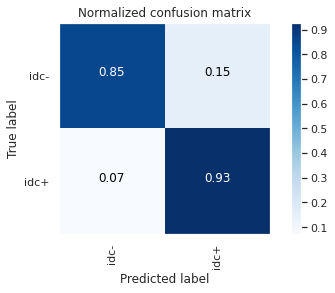

Epoch 23/30
6893/6893 [==============================] - 887s 129ms/step - loss: 0.1973 - accuracy: 0.9196 - val_loss: 0.2800 - val_accuracy: 0.8906

Epoch 00023: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 25s 29ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:25.366003


---------------------
| Balanced Accuracy  |
---------------------

    0.8904949936539275


---------------------
|      Accuracy      |
---------------------

    0.8904949936539275


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.86      0.93      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6065 1

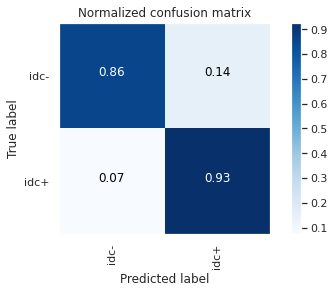

Epoch 24/30
6893/6893 [==============================] - 901s 131ms/step - loss: 0.1963 - accuracy: 0.9199 - val_loss: 0.2921 - val_accuracy: 0.8929

Epoch 00024: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:19.433202


---------------------
| Balanced Accuracy  |
---------------------

    0.892821886898886


---------------------
|      Accuracy      |
---------------------

    0.8928218868988859


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.92      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6122  9

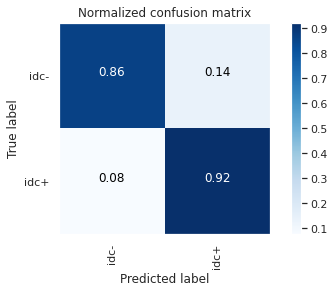

Epoch 25/30
6893/6893 [==============================] - 883s 128ms/step - loss: 0.1958 - accuracy: 0.9204 - val_loss: 0.2819 - val_accuracy: 0.8891

Epoch 00025: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 26s 29ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:25.938359


---------------------
| Balanced Accuracy  |
---------------------

    0.8890142434071358


---------------------
|      Accuracy      |
---------------------

    0.8890142434071358


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.92      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6071 1

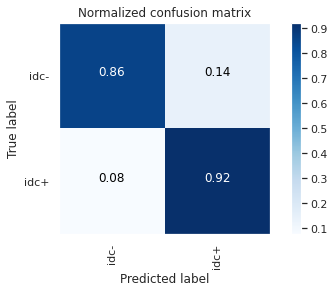

Epoch 26/30
6893/6893 [==============================] - 885s 128ms/step - loss: 0.1948 - accuracy: 0.9199 - val_loss: 0.3026 - val_accuracy: 0.8895

Epoch 00026: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:18.635971


---------------------
| Balanced Accuracy  |
---------------------

    0.889507826822733


---------------------
|      Accuracy      |
---------------------

    0.889507826822733


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.92      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6082 100

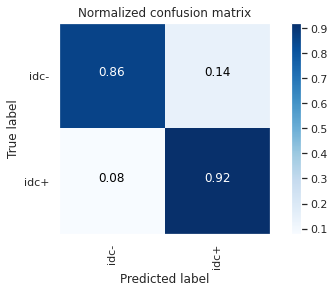

Epoch 27/30
6893/6893 [==============================] - 886s 129ms/step - loss: 0.1947 - accuracy: 0.9201 - val_loss: 0.3066 - val_accuracy: 0.8865

Epoch 00027: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 19s 21ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:19.027391


---------------------
| Balanced Accuracy  |
---------------------

    0.8864053024961218


---------------------
|      Accuracy      |
---------------------

    0.8864053024961218


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7091
           1       0.85      0.93      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[5955 1

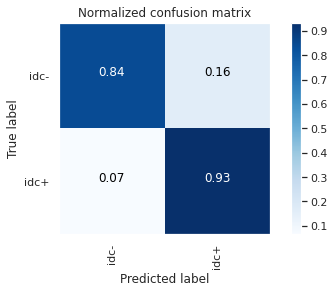

Epoch 28/30
6893/6893 [==============================] - 888s 129ms/step - loss: 0.1933 - accuracy: 0.9204 - val_loss: 0.2978 - val_accuracy: 0.8861

Epoch 00028: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 27s 30ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:41.011626


---------------------
| Balanced Accuracy  |
---------------------

    0.8860527429135524


---------------------
|      Accuracy      |
---------------------

    0.8860527429135524


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      7091
           1       0.85      0.93      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[5950 1

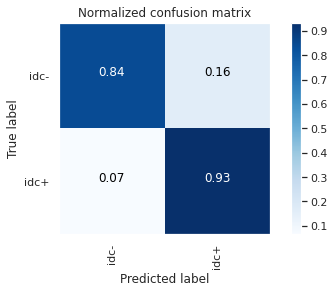

Epoch 29/30
6893/6893 [==============================] - 891s 129ms/step - loss: 0.1908 - accuracy: 0.9225 - val_loss: 0.2906 - val_accuracy: 0.8907

Epoch 00029: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 20s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:19.601181


---------------------
| Balanced Accuracy  |
---------------------

    0.8905655055704415


---------------------
|      Accuracy      |
---------------------

    0.8905655055704415


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.92      0.89      7091

    accuracy                           0.89     14182
   macro avg       0.89      0.89      0.89     14182
weighted avg       0.89      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6082 1

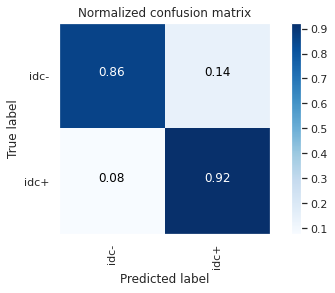

Epoch 30/30
6893/6893 [==============================] - 894s 130ms/step - loss: 0.1916 - accuracy: 0.9216 - val_loss: 0.3160 - val_accuracy: 0.8836

Epoch 00030: val_accuracy did not improve from 0.89376
Predicting test data
887/887 [==============================] - 20s 22ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:19.766166


---------------------
| Balanced Accuracy  |
---------------------

    0.8835143139190523


---------------------
|      Accuracy      |
---------------------

    0.8835143139190523


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      7091
           1       0.86      0.92      0.89      7091

    accuracy                           0.88     14182
   macro avg       0.89      0.88      0.88     14182
weighted avg       0.89      0.88      0.88     14182

--------------------
| Confusion Matrix |
--------------------

 [[5986 1

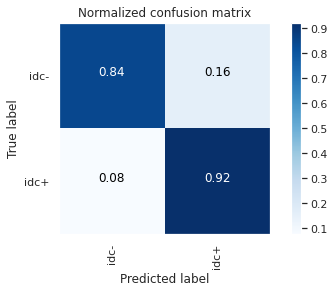

In [29]:
'''
#using augmentation data
history = model.fit_generator(train_generator, 
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              class_weight =class_weights,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )
#using raw data
history = model.fit_generator(train_data_label, 
                              steps_per_epoch = epoch_step,
                              validation_data=train_val_data,
                              epochs = 70,
                              validation_steps= val_step, 
                              class_weight =class_weights,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )


epoch_step = (len(train_data) // 16)
print(epoch_step)
val_step=len(test_data)// 16
print(val_step)
train_val_data=(test_data, test_label)
#print(train_generator.shape)
train_data_label=(train_data,train_label)
#print(val_generator.shape)
#(self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, validation_freq, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch)

history = model.fit_generator( 
                        train_datagen.flow(train_data,train_label),
                        steps_per_epoch=epoch_step,
                        epochs = 70,
                        verbose = 1,
                        callbacks = get_callbacks(),
                        validation_data=(test_data,test_label),
                        validation_steps = val_step,
                        class_weight =weights
                        )

'''
#from keras.models import load_model
model.load_weights('../input/covxnet/220603-covnet-V2-1fold-augmentation-2nd-turn.h5')
print("load weight success")
model.trainable=True
history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              epochs = epoch_4_test,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )

# Loading Best Model

In [30]:
from keras.models import load_model
best_model = load_model('./best_model_multiclass_128.h5')

# Best Model Performance
def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):

Predicting test data
887/887 [==============================] - 23s 23ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:22.905611


---------------------
| Balanced Accuracy  |
---------------------

    0.8936680298970526


---------------------
|      Accuracy      |
---------------------

    0.8936680298970526


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7091
           1       0.87      0.93      0.90      7091

    accuracy                           0.89     14182
   macro avg       0.90      0.89      0.89     14182
weighted avg       0.90      0.89      0.89     14182

--------------------
| Confusion Matrix |
--------------------

 [[6100  991]
 [ 517 6574]]


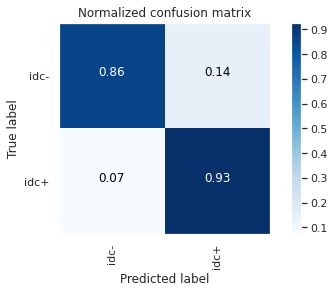

calculate other score
predicting validation data
2069/2069 [==============================] - 45s 22ms/step
predicting test data
6894/6894 [==============================] - 220s 32ms/step
Train accuracy Score------------>
50.048 %
Val accuracy Score--------->
89.235 %
Test accuracy Score--------->
89.367 %
F1 Score--------------->
89.355 %
Cohen Kappa Score------------->
78.734 %
Recall-------------->
89.367 %
Precision-------------->
89.543 %


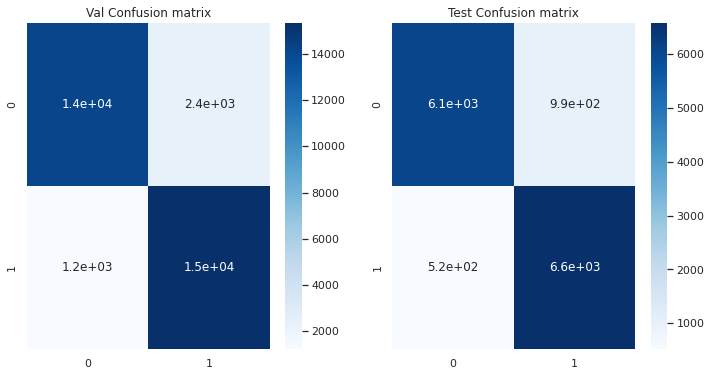

In [31]:
'''
test_model(best_model, 
           val_generator,
           y_test = np.argmax(test_label, axis = 1),
           class_labels = ['Normal', 'Viral', 'Bacterial'])
           '''
#must use train_label1 as train_label went through a shuffle in image-data-generator
test_final_model(best_model, train_generator, 
               val_generator, val2_generator, 
               np.argmax(train_label1, axis=1),
               np.argmax(test_label, axis=1),
               np.argmax(val_label, axis=1), 
               class_labels = ['idc-', 'idc+'])

# Plotting EpochPlot

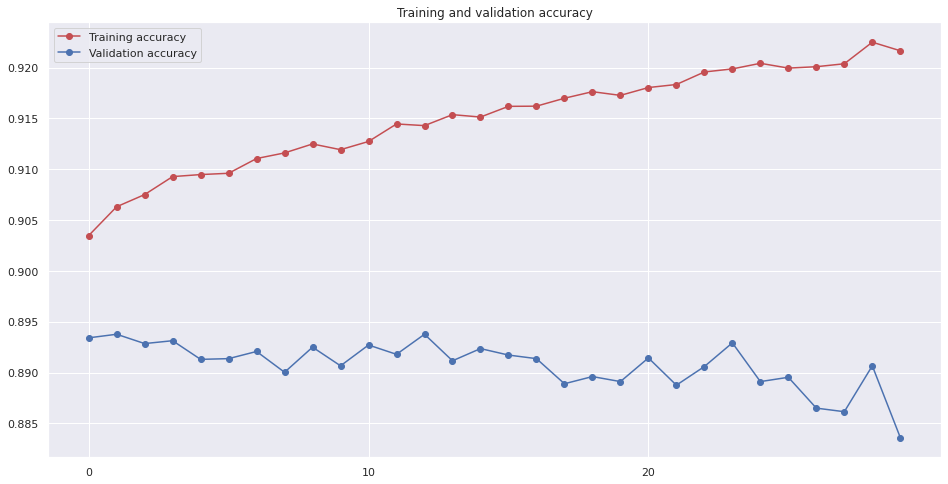

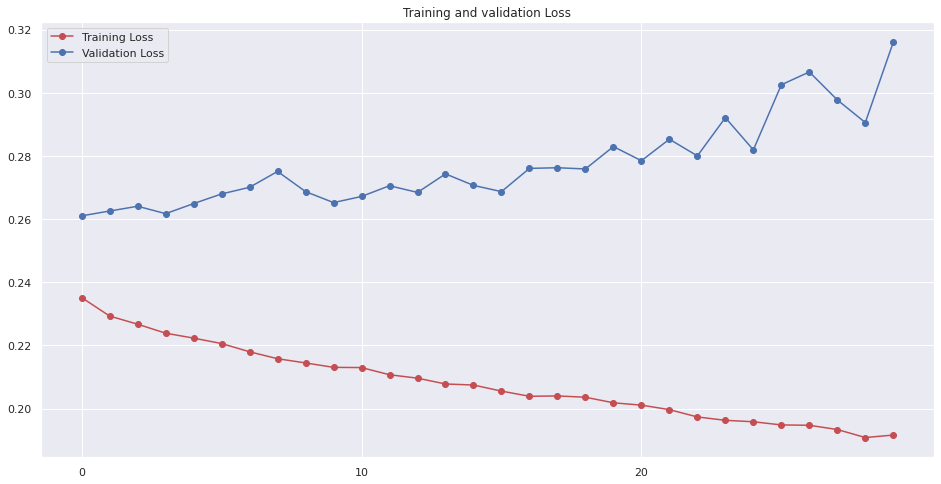

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()


In [33]:
#print(y_test)

from sklearn.cross_validation import train_test_split# Grad-CAM and Saliency Map 
coming soon....